# ASSIGNMENT 2 : MDPs AND DYNAMIC PROGRAMMING

**Due date : 05/02/2018**

**By : Julien Roy and David Kanaa**


# SECTION 1 - Theory

### Question 1 : 

Bla bla bla 

$$Maths + maths = Maths$$

### Question 2 : 


Bla bla bla 

$$Maths + maths = Maths$$
$$ Maths + 2 * 3 = 2x + 5$$

# SECTION 2 - PROGRAMMING

In [1]:
import numpy as np
import time
import copy
import operator
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

Bla bla bla MDP bla bla

# 2-states MDP

* $P(s_0 | s_0, a_0) = 0.5,  r = 5$
* $P(s_1 | s_0, a_0) = 0.5,  r = 5$
* $P(s_0 | s_0, a_1) = 0$
* $P(s_1 | s_0, a_1) = 1,  r = 10$
* $P(s_1 | s_0, a_2) = 0$
* $P(s_1 | s_1, a_2) = 1,  r = -1$


* $\gamma = 0.95$

![2-states world](2-states_world.png)

In [2]:
def create_2statesworld():

    P = np.zeros((2,2,3)) # P(s'|s,a) ... our model of the environment
    P[0,0,0] = 0.5
    P[1,0,0] = 0.5
    P[1,0,1] = 1.
    P[1,1,2] = 1.

    R = np.zeros((2,3))  # R(s,a) ... the reward funciton 
    R[0,0] = 5
    R[0,1] = 10
    R[1,2] = -1

    states = [0, 1]
    actions = [[0, 1], [2]]
    next_states = [0, 1]
    gamma = 0.95
    
    return P, R, states, actions, next_states, gamma

### Implementations

In [3]:
def policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, epsilon=1e-4, modified=False):
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)  # V(s) ... our value function estimate for PI
    PI = copy.deepcopy(PI_init)  # PI(s) ... our greedy policy
    policy_stable = False
    all_k = []
    
    while not policy_stable:
        
        # 2. POLICY EVALUATION (iterates until V_k converges) 
        k = 0
        V_kplus1 = copy.deepcopy(V_k)
        delta = epsilon + 1
        while delta > epsilon and (k < 5 or not modified):

            delta = 0
            for s in states:
                v = 0
                for n in next_states:

                    # Bellman's update rule
                    a = int(PI[s])
                    v += P[n,s,a] * (R[s,a] + gamma * V_k[n])

                # Keeps biggest difference seen so far
                V_kplus1[s] = v
                delta = np.max([delta, np.abs(V_kplus1[s] - V_k[s])])

            # Updates our current estimate
            V_k = copy.deepcopy(V_kplus1)
            k += 1
        all_k.append(k)

        # 3. POLICY IMPROVEMENT (greedy action selection with respect to V_k)
        Q = {0: {0: 0,   # state0, action0
                 1: 0},  # state0, action1
             1: {2: 0}}  # state1, action2
        
        policy_stable = True
        old_PI = copy.deepcopy(PI)
        
        for s in states: 
            for a in actions[s]:
                for n in next_states:
                    
                    # Policy Improvement rule
                    Q[s][a] += P[n,s,a] * (R[s,a] + gamma * V_k[n])
                    
            PI[s] = max(Q[s].items(), key=operator.itemgetter(1))[0]
                    
            if old_PI[s] != PI[s]:
                policy_stable = False
    
    return V_k, all_k, PI 

In [4]:
def value_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, epsilon=1e-4):
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)  # V(s) ... our value function estimate for PI
    PI = copy.deepcopy(PI_init)  # PI(s) ... our greedy policy
        
    # 2. POLICY EVALUATION (makes only 1 sweep before taking the max over the actions)
    k = 0
    V_kplus1 = copy.deepcopy(V_k)
    delta = epsilon + 1
    
    while delta > epsilon:

        delta = 0
        
        Q = {0: {0: 0,   # state0, action0
                 1: 0},  # state0, action1
             1: {2: 0}}  # state1, action2
        for s in states:
            v = 0
            for a in actions[s]:
                for n in next_states:
                
                    # Bellman's optimality update rule
                    Q[s][a] += P[n,s,a] * (R[s,a] + gamma * V_k[n])

            # This step replaces the poilicy improvement step (gets the maximal value)
            V_kplus1[s] = max(Q[s].items(), key=operator.itemgetter(1))[1]
            
            # Keeps biggest difference seen so far
            delta = np.max([delta, np.abs(V_kplus1[s] - V_k[s])])

        # Updates our current estimate
        V_k = copy.deepcopy(V_kplus1)
        k += 1
    
    # Updates the policy to be greedy with respect to the value function
    for s in states:
        PI[s] = max(Q[s].items(), key=operator.itemgetter(1))[0]
    
    return V_k, k, PI 

### Experiments

In [25]:
# Initializations
V_init = np.zeros((2,), dtype=np.float)                            # V(s) ... our value function estimate for PI
PI_init = np.array([np.random.uniform(0, 2), 2], dtype=np.int)     # PI(s) ... our greedy policy

# The 2-states world
P, R, states, actions, next_states, gamma = create_2statesworld()

print("INITIALIZATION")
print("Initial value function V is filled with zeros whereas initial policy is random among legal actions for each state")
print("\nV = ", np.round(V_init))
print("\nPI = ", PI_init)


PolIt_results = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma)

print("\n\nRESULTS FOR POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(PolIt_results[1]), PolIt_results[1]))
print("\nV = ", np.round(PolIt_results[0], 2))
print("\nPI = ", PolIt_results[2])

ValIt_results = value_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma)

print("\n\nRESULTS FOR VALUE ITERATION -------------")
print("Policy found in {} iterations".format(ValIt_results[1]))
print("\nV = \n", np.round(ValIt_results[0], 2))
print("\nPI = ", ValIt_results[2])


M_PolIt_results = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, modified=True)

print("\n\nRESULTS FOR MODIFIED POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(M_PolIt_results[1]), M_PolIt_results[1]))
print("\nV = ", np.round(M_PolIt_results[0], 2))
print("\nPI = ", M_PolIt_results[2])

INITIALIZATION
Initial value function V is filled with zeros whereas initial policy is random among legal actions for each state

V =  [ 0.  0.]

PI =  [1 2]


RESULTS FOR POLICY ITERATION -------------
Policy found in 2 iterations, where each policy evaluation lasted for k = [181, 11]

V =  [ -8.57 -20.  ]

PI =  [0 2]


RESULTS FOR VALUE ITERATION -------------
Policy found in 181 iterations

V = 
 [ -8.57 -20.  ]

PI =  [0 2]


RESULTS FOR MODIFIED POLICY ITERATION -------------
Policy found in 2 iterations, where each policy evaluation lasted for k = [5, 5]

V =  [ 3.39 -8.03]

PI =  [0 2]


### Discussion

Blablabla blabla

# Gridworld MDP

(Image taken from Sutton's slides on DP)
![grid world](gridworld.PNG)

In [27]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

def create_gridworld(world_size, terminal_states):
    """
    world_size: height and width of the squared-shape gridworld
    return
        actions: list of str, possible actions
        states: list of coordinate tuples representing all non-terminal states
        nextState: list of list of dict, index 3 times to return the next state coordinate tuple
    """

    # left, up, right, down
    actions = ['L', 'U', 'R', 'D']

    # Next
    nextState = []
    for i in range(0, world_size):
        nextState.append([])
        for j in range(0, world_size):
            # Creates a dictionnary that
            next = dict()
            if i == 0:
                next['U'] = (i, j)
            else:
                next['U'] = (i - 1, j)

            if i == world_size - 1:
                next['D'] = (i, j)
            else:
                next['D'] = (i + 1, j)

            if j == 0:
                next['L'] = (i, j)
            else:
                next['L'] = (i, j - 1)

            if j == world_size - 1:
                next['R'] = (i, j)
            else:
                next['R'] = (i, j + 1)

            nextState[i].append(next)
            
    states = []
    for i in range(0, world_size):
        for j in range(0, world_size):
            if (i,j) in terminal_states:
                continue
            else:
                states.append((i, j))
                
    return actions, states, nextState

### Implementations

In [28]:
def policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon=1e-4, modified=False):

    # The reward is always -1
    R = -1
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)
    PI = copy.deepcopy(PI_init)
    policy_stable = False
    all_k = []
    idx_to_a = {0:'L', 1:'U', 2:'R', 3:'D'}

    while not policy_stable:
        
        # 2. POLICY EVALUATION (iterates until V_k converges)
        k = 0
        V_kplus1 = copy.deepcopy(V_k)
        delta = epsilon + 1
        
        while delta > epsilon and (k < 5 or not modified):

            delta = 0
            for i, j in states:
                
                # Here the next state is fully defined by the policy (there is no uncertainty on the transition)
                a = idx_to_a[PI[i,j]]
                newPosition = nextState[i][j][a]
                P = 1.

                # Bellman's update rule
                V_kplus1[i, j] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])

                # Keeps biggest difference seen so far
                delta = np.max([delta, np.abs(V_kplus1[i,j] - V_k[i,j])])

            # Updates our current estimate
            V_k = copy.deepcopy(V_kplus1)
            k += 1
        all_k.append(k)

        # 3. POLICY IMPROVEMENT (greedy action selection with respect to V_k)
        Q = np.zeros((world_size, world_size, 4), dtype=np.float)
        
        policy_stable = True
        old_PI = copy.deepcopy(PI)
        
        for i, j in states:
            for a_idx in range(4): # actions
                    
                # Again the next state is fully defined by the chosen action (there is no uncertainty on the transition)
                a = idx_to_a[a_idx]
                newPosition = nextState[i][j][a]
                P = 1.

                # Policy Improvement rule
                Q[i,j,a_idx] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])
                    
            PI[i,j] = np.argmax(Q[i,j,:])
                    
            if old_PI[i,j] != PI[i,j]:
                policy_stable = False
    
    return V_k, all_k, PI 

In [29]:
def value_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon=1e-4):

    # The reward is always -1
    R = -1
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)
    PI = copy.deepcopy(PI_init)
    idx_to_a = {0:'L', 1:'U', 2:'R', 3:'D'}
        
    # 2. POLICY EVALUATION (makes only 1 sweep before taking the max over the actions)
    k = 0
    V_kplus1 = copy.deepcopy(V_k)
    delta = epsilon + 1
    Q = np.zeros((world_size, world_size, 4), dtype=np.float)
    while delta > epsilon:

        # Only one sweep of evaluation before taking the max
        delta = 0
        for i, j in states:
            # Now evaluates the value function for each state for every possible action (not just with respect to current policy)
            for a_idx in range(4): # actions

                # Again the next state is fully defined by the chosen action (there is no uncertainty on the transition)
                a = idx_to_a[a_idx]
                newPosition = nextState[i][j][a]
                P = 1.

                # Update rule
                Q[i,j,a_idx] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])

            # This step replaces the poilicy improvement step
            V_kplus1[i,j] = np.max(Q[i,j,:])

            # Keeps biggest difference seen so far
            delta = np.max([delta, np.abs(V_kplus1[i,j] - V_k[i,j])])

        # Updates our current estimate
        V_k = copy.deepcopy(V_kplus1)
        k += 1
        
    # Updates the policy to be greedy with respect to the value function
    for i, j in states:
        PI[i,j] = np.argmax(Q[i,j,:])
    
    return V_k, k, PI 

In [30]:
def print_policy(policy, terminal_states):
    
    #idx_to_symbol = {0:'\u25C0', 1:'\u25BC', 2:'\u25B6', 3:'\u25BC'}
    idx_to_symbol = {0:'\u2190', 1:'\u2191', 2:'\u2192', 3:'\u2193'}
    
    border_str = "\u00B7 "
    for i in range(policy.shape[0]):
        border_str += "\u2015 "
    border_str += "\u00B7 "
    #print(border_str)
    
    for i in range(policy.shape[0]):
        
        string = ""
        #string = "| "
        for j in range(policy.shape[1]):
            
            if (i,j) in terminal_states:
                string += '\u25A0 '
            else:
                string += idx_to_symbol[policy[i, j]]+" "
        
        #string += "|"
        print(string)
    
    #print(border_str)
    
    return

### Experiments

INITIALIZATION
Initial value function V is filled with zeros whereas initial policy is random

V = 
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

PI = 
■ ↓ ↑ ↓ ↓ 
↑ → ↑ → ↑ 
↑ ↑ ↓ ■ ← 
← → ■ → → 
← ← ↓ ↑ ■ 


RESULTS FOR POLICY ITERATION -------------
Policy found in 4 iterations, where each policy evaluation lasted for k = [918, 5, 2, 1]

V = 
 [[ 0. -1. -2. -2. -3.]
 [-1. -2. -2. -1. -2.]
 [-2. -2. -1.  0. -1.]
 [-2. -1.  0. -1. -1.]
 [-3. -2. -1. -1.  0.]]

PI = 
■ ← ← ↓ ← 
↑ ← → ↓ ← 
↑ → → ■ ← 
→ → ■ ← ↓ 
↑ ↑ ↑ → ■ 


RESULTS FOR VALUE ITERATION -------------
Policy found in 4 iterations

V = 
 [[ 0. -1. -2. -2. -3.]
 [-1. -2. -2. -1. -2.]
 [-2. -2. -1.  0. -1.]
 [-2. -1.  0. -1. -1.]
 [-3. -2. -1. -1.  0.]]

PI = 
■ ← ← ↓ ← 
↑ ← → ↓ ← 
↑ → → ■ ← 
→ → ■ ← ↓ 
↑ ↑ ↑ → ■ 


RESULTS FOR MODIFIED POLICY ITERATION -------------
Policy found in 4 iterations, where each policy evaluation lasted for k = [5, 5, 2, 1]

V 

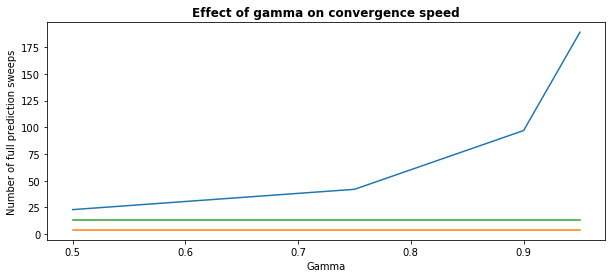

In [35]:
# Hyper-params
gamma = 0.99
epsilon = 1e-4

# The GRIDWORLD
world_size = 5
terminal_states = [(0,0), (world_size-1, world_size-1), (world_size-2, world_size-3), (2, world_size-int(world_size/2))]
actions, states, nextState = create_gridworld(world_size, terminal_states)

# Initializations
V_init = np.zeros((world_size, world_size), dtype=np.float)    # V(s) ... our value function estimate for PI
PI_init = np.random.randint(low=0, high=4, size=(world_size, world_size), dtype=np.int)     # PI(s) ... our greedy policy

print("INITIALIZATION")
print("Initial value function V is filled with zeros whereas initial policy is random")
print("\nV = \n", np.round(V_init))
print("\nPI = ")
print_policy(PI_init, terminal_states)

PolIt_results = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon)

print("\n\nRESULTS FOR POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(PolIt_results[1]), PolIt_results[1]))
print("\nV = \n", np.round(PolIt_results[0]))
print("\nPI = ")
print_policy(PolIt_results[2], terminal_states)

ValIt_results = value_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon)

print("\n\nRESULTS FOR VALUE ITERATION -------------")
print("Policy found in {} iterations".format(ValIt_results[1]))
print("\nV = \n", np.round(ValIt_results[0]))
print("\nPI = ")
print_policy(ValIt_results[2], terminal_states)

M_PolIt_results = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon, modified=True)

print("\n\nRESULTS FOR MODIFIED POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(M_PolIt_results[1]), M_PolIt_results[1]))
print("\nV = \n", np.round(M_PolIt_results[0]))
print("\nPI = ")
print_policy(M_PolIt_results[2], terminal_states)

print("\n\nEFFECT OF GAMMA ON CONVERGENCE SPEED")

logg = {"policy_iteration": [], "value_iteration": [], "M_policy_iteration": []}
# For different values of gamma
gammas = [0.50, 0.75, 0.90, 0.95]
for g in gammas:
    
    # Run Policy Iteration
    _, PolIt_k, _ = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon)
    logg['policy_iteration'].append(sum(PolIt_k))
    
    # Run Value Iteration
    _, ValIt_k, _ = value_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon)
    logg['value_iteration'].append(ValIt_k)
    
    # Run Modified Policy Iteration
    _, M_PolIt_k, _ = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon, modified=True)
    logg['M_policy_iteration'].append(sum(M_PolIt_k))
    
plt.figure(figsize=(10,4))
plt.plot(gammas, logg['policy_iteration'], label="Policy Iteration")
plt.plot(gammas, logg['value_iteration'], label="Value Iteration")
plt.plot(gammas, logg['M_policy_iteration'], label="Modified Policy Iteration")
plt.title('Effect of gamma on convergence speed', fontweight='bold')
plt.xlabel('Gamma')
plt.ylabel('Number of full prediction sweeps')
plt.show()

### Discussion

Bla bla bla

# Conclusion

Bl abla bla bla bla